Given N battlefields and S soldiers, the number of possible distributions of soldiers is 
$${N + S - 1 \choose N - 1}$$
By partitioning on the number of soldiers on the first battlefield and letting $s$ be the number of soldiers in the remaining $N-1$ battlefields, we note
$$
{N + S - 1 \choose N - 1} = \sum_{s = 0}^S {N + s - 2 \choose N - 2}
$$
We can hence extract the number of soldiers on the first battlefield. Then we proceed recursively. For example, for $(N, S) = (3,4)$, we have $15$ possibilities. Let $i$ denote the index.


If $i < {N - 2 \choose N - 2} = 1$, we know the first battlefield contains all soldiers.

Elif $i < 1 + {N + 1 - 2 \choose N - 2} = 1 + 2$, we know the first battlefield all but one soldiers.

Elif $i < 1 + 2 + {N + 2 - 2 \choose N - 2} = 1 + 2 + 3$, we know the first battlefield all but two soldiers.

etc. Once we know the amount of soldiers in the first battlefield, we call the function on $(N-1, S-s)$.

For example, if $i=4$, we see that the first battlefield has 2 solders. We then set $i = i- 3=1$ and run the function on $(2, 2)$ so we know that the second battlefield has 1 soldier.





Now we find the NE

In [1]:
from infrastructure import find_CE
from Blotto_infra import *
import numpy as np

Collapsed Blotto

In [299]:
g = Collapsed_Blotto(3, (3, 3))
SE = Single_Evaluation(g, 10000, agent=Regret_Minimisation_Agent)

In [300]:
SE.viable_strategies()

Viable strategies for agent 0:
	 Probability of playing [0 1 2] (with index 1) is 0.375.
	 Probability of playing [1 1 1] (with index 2) is 0.625.




Viable strategies for agent 1:
	 Probability of playing [1 1 1] (with index 2) is 1.0.






In [271]:
strat = SE.get_strategies()[-1]


In [272]:
evaluate(Agent(g, 0 ,strat))

3.333333333333333e-05

Normal Blotto

In [214]:
g2 = Blotto(3, (5, 5))
SE = Single_Evaluation(g2, 50000, agent=Regret_Minimisation_Agent)

In [215]:
SE.viable_strategies()

Viable strategies for agent 0:
	 Probability of playing [3 2 0] (with index 3) is 0.13.
	 Probability of playing [3 1 1] (with index 4) is 0.1.
	 Probability of playing [3 0 2] (with index 5) is 0.105.
	 Probability of playing [2 3 0] (with index 6) is 0.1.
	 Probability of playing [2 0 3] (with index 9) is 0.122.
	 Probability of playing [1 3 1] (with index 11) is 0.108.
	 Probability of playing [1 1 3] (with index 13) is 0.114.
	 Probability of playing [0 3 2] (with index 17) is 0.128.
	 Probability of playing [0 2 3] (with index 18) is 0.093.




Viable strategies for agent 1:
	 Probability of playing [3 2 0] (with index 3) is 0.133.
	 Probability of playing [3 1 1] (with index 4) is 0.113.
	 Probability of playing [3 0 2] (with index 5) is 0.083.
	 Probability of playing [2 3 0] (with index 6) is 0.096.
	 Probability of playing [2 0 3] (with index 9) is 0.126.
	 Probability of playing [1 3 1] (with index 11) is 0.102.
	 Probability of playing [1 1 3] (with index 13) is 0.117.
	 Pro

In [216]:
strat2 = SE.get_strategies()[1]


In [247]:
faceoff(Surrogate_Blotto_Agent(g, g2, 0, strat), Agent(g2, 1, strat2), round=50000, mat=False)

0.00644

In [86]:
g = Collapsed_Blotto(3, (4, 4))
prior = np.array([0.1, 0.3 ,0.3, 0.3])
SE = Single_Evaluation(g, 300, agent=Regret_Minimisation_Agent, priors=[np.array([0.1, 0.3 ,0.3, 0.3]), np.array([0.1, 0.3 ,0.3, 0.3])])

In [87]:
SE.viable_strategies()

Viable strategies for agent 0:
	 Probability of playing [0 1 3] (with index 1) is 0.001.
	 Probability of playing [0 2 2] (with index 2) is 0.975.
	 Probability of playing [1 1 2] (with index 3) is 0.024.




Viable strategies for agent 1:
	 Probability of playing [0 0 4] (with index 0) is 0.001.
	 Probability of playing [0 1 3] (with index 1) is 0.003.
	 Probability of playing [0 2 2] (with index 2) is 0.99.
	 Probability of playing [1 1 2] (with index 3) is 0.006.






In [88]:
strat = SE.get_strategies()[0]

In [148]:
evaluate(Agent(g, 0 ,np.array([0,0.123,877])))

0

In [145]:
g = Collapsed_Blotto(3, (3, 3))
SE = Single_Evaluation(g, 5000, agent=Swap_Regret_Agent, 
save_hist=True, priors=[np.array([0, 0., 1]), np.array([0.6, 0.2, 0.2])])
SE.viable_strategies()

Viable strategies for agent 0:
	 Probability of playing [1 1 1] (with index 2) is 1.0.




Viable strategies for agent 1:
	 Probability of playing [0 0 3] (with index 0) is 0.001.
	 Probability of playing [0 1 2] (with index 1) is 0.999.






In [56]:
SE.agents[0].strategy_sums[1][:10]

array([0.        , 0.08333333, 0.11111111, 0.20833333, 0.16666667,
       0.13888889, 0.11904762, 0.10416667, 0.09259259, 0.08333333])

In [436]:
SE.agents[0].strategy_sums[2][:10]

array([0.8       , 0.65      , 0.6       , 0.575     , 0.56      ,
       0.55      , 0.54285714, 0.5375    , 0.53333333, 0.53      ])

In [438]:
SE.agents[1].strategy_sums[1][:10]

array([0.8       , 0.4       , 0.26666667, 0.2       , 0.16      ,
       0.13333333, 0.11428571, 0.1       , 0.08888889, 0.08      ])

In [437]:
SE.agents[1].strategy_sums[2][:10]

array([0.1       , 0.55      , 0.7       , 0.775     , 0.82      ,
       0.85      , 0.87142857, 0.8875    , 0.9       , 0.91      ])

In [386]:
faceoff(Agent(g, 0, np.array([0, 1/2, 1/2])), Agent(g, 1, np.array([0, 0.2, 0.8])))

0.0

In [360]:
strat = np.array([0, 1, 0])

evaluate(Agent(g, 0 ,strat))

0

In [103]:
temp_SE = Single_Evaluation(g, 100, agent=Regret_Minimisation_Agent, save_hist=True, priors=[np.array([0, 0., 1]), np.array([0.99, 0.008, 0.002])])

In [104]:
temp_SE.viable_strategies()

Viable strategies for agent 0:
	 Probability of playing [0 0 3] (with index 0) is 0.01.
	 Probability of playing [0 1 2] (with index 1) is 0.005.
	 Probability of playing [1 1 1] (with index 2) is 0.985.




Viable strategies for agent 1:
	 Probability of playing [0 0 3] (with index 0) is 0.015.
	 Probability of playing [0 1 2] (with index 1) is 0.406.
	 Probability of playing [1 1 1] (with index 2) is 0.58.






In [113]:
# traj = np.array([temp_SE.agents[1].strategy_sums ])

# plotOnSimplex(traj, "./plots/Regret_matching_agent/RM_path3")

In [114]:
# traj = np.array([temp_SE.agents[0].strategy_sums ])

# plotOnSimplex(traj, "./plots/Regret_matching_agent/RM_path3")

In [124]:
traj.shape

(10, 3, 1000)

In [142]:
traj = np.array([Single_Evaluation(g, 100, agent=Swap_Regret_Agent, save_hist=True, priors=[np.array([1/3, 1/3, 1/3]), np.array([1/3, 1/3, 1/3])]).agents[0].strategy_sums for i in range(100)])


(3, 100, 100)


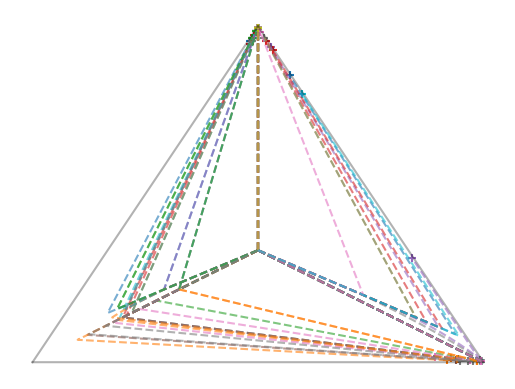

In [144]:

plotOnSimplex(traj, "./plots/swap_agent/SA_many")

In [131]:
# traj = np.array([Single_Evaluation(g, 7, agent=Regret_Minimisation_Agent, save_hist=True).agents[0].strategy_sums for i in range(100)])

# plotOnSimplex(traj, "./plots/Regret_matching_agent/RM_path2")

In [ ]:
g = Collapsed_Blotto(3, (3, 3))
# SE = Single_Evaluation(g, 1000, agent=Swap_Regret_Agent, save_hist=True)

(3, 500, 50)


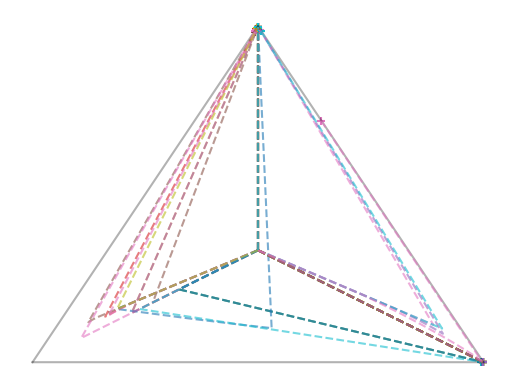

In [314]:
traj = np.array([Single_Evaluation(g, 500, agent=Swap_Regret_Agent, save_hist=True).agents[0].strategy_sums for i in range(50)])

plotOnSimplex(traj, "./plots/swap_agent/plot2")

In [9]:

evaluate(Agent(g, 0, np.array([1,0,0])))

1.0

In [103]:
SE.viable_strategies(eps=0.05)

Viable strategies for agent 0:
	 Probability of playing [3 2 0] (with index 3) is 0.11.
	 Probability of playing [3 1 1] (with index 4) is 0.11.
	 Probability of playing [3 0 2] (with index 5) is 0.116.
	 Probability of playing [2 3 0] (with index 6) is 0.114.
	 Probability of playing [2 0 3] (with index 9) is 0.111.
	 Probability of playing [1 3 1] (with index 11) is 0.108.
	 Probability of playing [1 1 3] (with index 13) is 0.111.
	 Probability of playing [0 3 2] (with index 17) is 0.111.
	 Probability of playing [0 2 3] (with index 18) is 0.108.




Viable strategies for agent 1:
	 Probability of playing [3 2 0] (with index 3) is 0.099.
	 Probability of playing [3 1 1] (with index 4) is 0.112.
	 Probability of playing [3 0 2] (with index 5) is 0.119.
	 Probability of playing [2 3 0] (with index 6) is 0.118.
	 Probability of playing [2 0 3] (with index 9) is 0.104.
	 Probability of playing [1 3 1] (with index 11) is 0.114.
	 Probability of playing [1 1 3] (with index 13) is 0.11.
	 P

In [55]:
SE.viable_strategies(eps=0.05)
strat = SE.get_strategies()[0]

Viable strategies for agent 0:
	 Probability of playing [3 2 0] (with index 3) is 0.108.
	 Probability of playing [3 1 1] (with index 4) is 0.107.
	 Probability of playing [3 0 2] (with index 5) is 0.122.
	 Probability of playing [2 3 0] (with index 6) is 0.124.
	 Probability of playing [2 0 3] (with index 9) is 0.104.
	 Probability of playing [1 3 1] (with index 11) is 0.104.
	 Probability of playing [1 1 3] (with index 13) is 0.109.
	 Probability of playing [0 3 2] (with index 17) is 0.107.
	 Probability of playing [0 2 3] (with index 18) is 0.115.




Viable strategies for agent 1:
	 Probability of playing [3 2 0] (with index 3) is 0.084.
	 Probability of playing [3 1 1] (with index 4) is 0.123.
	 Probability of playing [3 0 2] (with index 5) is 0.119.
	 Probability of playing [2 3 0] (with index 6) is 0.146.
	 Probability of playing [2 0 3] (with index 9) is 0.072.
	 Probability of playing [1 3 1] (with index 11) is 0.102.
	 Probability of playing [1 1 3] (with index 13) is 0.136.


In [32]:
strat = np.zeros(21)
strat[4] = 1
evaluate(Agent(g, 0, strat))

1.0

In [5]:
g = Blotto(3, (3, 3))
SE = Single_Evaluation(g, 50000, Swap_Regret_Agent)
strat = SE.get_strategies()[0]

In [6]:
strat

array([1.72629853e-05, 8.49838530e-02, 1.82324767e-01, 2.50692453e-01,
       3.44972421e-02, 6.15838676e-02, 2.63091629e-06, 1.36997558e-01,
       2.48897181e-01, 3.18516590e-06])

In [7]:
evaluate(Agent(g, 0, strat))

0.092

In [5]:
g = Blotto(3, (4, 4))

In [6]:
SE = Single_Evaluation(g, 5000)
strat = SE.get_strategies()[0]

In [7]:
evaluate(Agent(g, 0, strat))

0.031

In [8]:
g = Blotto(5, (7, 7))

In [8]:
SE = Single_Evaluation(Collapsed_Blotto(3, (7, 7)), 100000)
strat = SE.get_strategies()[0]

In [9]:
evaluate(Agent(Collapsed_Blotto(3, (7, 7)), 0, strat))

0

In [4]:
A = np.array([0, 0, 0])
B = np.array([1, 0, 0])
average_payoff(A, B)

-1.0

In [ ]:
def soldier_dist(i, N, S, out):
    if S == 0:
        out += [0] * N
        return np.array(out, dtype=int)
    if N == 1:
        out.append(S)
        return np.array(out, dtype=int)
    temp = 1
    for s in range(S + 1):
        if s >= 1:
            temp = (temp * (N + s - 2)) // s
        if temp > i:
            out.append(S - s)
            return soldier_dist(i, N - 1, s, out)
        else:
            i -= temp

In [16]:
# for i in range(100):
#     print(soldier_dist_collapsed(i, 3, 7, Collapsed_Blotto(3, (7, 7)).lookup_mats[0], []))

[0 0 7]
[0 1 6]
[0 2 5]
[0 3 4]
[1 1 5]
[1 2 4]
[1 3 3]
[2 2 3]


Exception: You are bad at coding >:(

In [4]:
g = Collapsed_Blotto(3, (3, 3))
print(g.action_counts)
p1 = np.ones(3)
# p1[0] = 0.05
# p1[1] = 0.2
# p1[2] = 0.75
p1 = p1/len(p1)
evaluate(Agent(g, 0, p1))


[3, 3]
Utility of Agent 0 is 467.9999999999977
[0.333 0.333 0.333]
Utility of Agent 1 is -467.9999999999977
[1. 0. 0.]
Utility of Agent 0 is 350.33333333333775
[0.333 0.333 0.333]
Utility of Agent 1 is 117.66666666666607
[0. 1. 0.]
Utility of Agent 0 is -7.666666666662252
[0.333 0.333 0.333]
Utility of Agent 1 is 358.0
[0. 0. 1.]


0.358

In [20]:
g = Collapsed_Blotto(3, (3, 3))
print(g.action_counts)
p1 = np.zeros(3)
p1[1] = 0.25
p1[2] = 0.75
p2 = np.zeros(4)

i = 2
p2[i] = 1

Trainer(g, [Agent(g, 0, p1), Agent(g, 1, p2)]).train(10000)
soldier_dist_collapsed(1, 3, 3, g.lookup_mats[0], [])

[4, 4]
Utility of Agent 0 is 0.0
[0.   0.25 0.75 0.  ]
Utility of Agent 1 is 0.0
[0. 0. 1. 0.]


array([0, 1, 2])

In [16]:
g._get_utility(0, (2, 1))

0.0

In [2]:
SE = Single_Evaluation(Collapsed_Blotto(3, (7, 7)), 100000)
SE

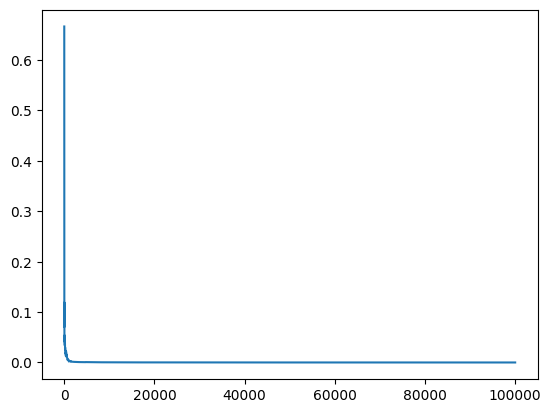

In [3]:
SE.plot_regrets()

In [3]:
for a in SE.agents:
    print(np.round(a.regrets, 2)) 

[-6.333433e+04 -2.998500e+04 -4.667000e+01  6.700000e-01 -2.539000e+03
  1.000000e+00 -6.564670e+03 -4.072000e+03]
[-7.091500e+04 -3.756967e+04  3.000000e+00  1.500000e+01 -4.248330e+03
  2.700000e+01 -1.448400e+04 -1.022067e+04]


In [13]:
Single_Evaluation(Blotto(3, (3, 3)), 1000000).viable_strategies(eps=0.1)

Viable strategies for agent 0:
	 Probability of playing [2 1 0] (with index 1) is 0.149.
	 Probability of playing [2 0 1] (with index 2) is 0.163.
	 Probability of playing [1 2 0] (with index 3) is 0.163.
	 Probability of playing [1 0 2] (with index 5) is 0.149.
	 Probability of playing [0 2 1] (with index 7) is 0.15.
	 Probability of playing [0 1 2] (with index 8) is 0.163.




Viable strategies for agent 1:
	 Probability of playing [2 1 0] (with index 1) is 0.163.
	 Probability of playing [2 0 1] (with index 2) is 0.164.
	 Probability of playing [1 2 0] (with index 3) is 0.164.
	 Probability of playing [1 0 2] (with index 5) is 0.163.
	 Probability of playing [0 2 1] (with index 7) is 0.163.
	 Probability of playing [0 1 2] (with index 8) is 0.165.






In [13]:
Single_Evaluation(Collapsed_Blotto(3, (3, 3)), 1000).viable_strategies(eps=0.01)

Viable strategies for agent 0:
	 Probability of playing [0 1 2] (with index 1) is 0.251.
	 Probability of playing [1 1 1] (with index 2) is 0.749.




Viable strategies for agent 1:
	 Probability of playing [0 1 2] (with index 1) is 0.25.
	 Probability of playing [1 1 1] (with index 2) is 0.748.






In [20]:
Collapsed_Blotto(3, (7, 7)).payoff_matrix[0][2]

array([ 0.33333333,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.33333333, -0.33333333])

In [6]:
Collapsed_Blotto(3, (7, 7)).payoff_matrix[0][5]

array([ 1.        ,  0.66666667,  0.        ,  0.        ,  0.33333333,
        0.        ,  0.        , -0.33333333])

In [5]:
Collapsed_Blotto(3, (7, 7)).payoff_matrix[0][3]

array([ 0.33333333,  0.        ,  0.        ,  0.        , -0.33333333,
        0.        ,  0.33333333,  0.66666667])

In [7]:
Collapsed_Blotto(3, (7, 7)).payoff_matrix[0][4]

array([ 1.        ,  0.33333333,  0.        ,  0.33333333,  0.        ,
       -0.33333333, -0.33333333, -1.        ])

In [12]:
import numpy as np

In [ ]:
arr =np.array([np.array([np.array([1,2,3]), np.array([4,5,6])]), np.array([np.array([1,2,3]) + 1, np.array([4,5,6]) + 2])] )
arr

array([[[1, 2, 3],
        [4, 5, 6]],

       [[2, 3, 4],
        [6, 7, 8]]])

In [ ]:
np.std(arr, axis=0)

array([[0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

We can collapse the number of strategies by arguing that to an agent, the order of the battlefields do not matter. Hence, letting the total number of partitions of $S$ soldiers into $N$  battlefields be $P_N(S)$, we have
$$
P_N(S) = P_{N-1}(S) + P_{N-1}(S-N) + P_{N-1}(S-2) +...
$$
where $P_n(0)=1$ and $P_n(M)=0$ for $M<0$


In [2]:
partition_matrix(3, 5)

[1. 1. 1. 1. 1. 1.] [0 0 0 0 0 1] inputs
[1. 1. 1. 1. 1. 1.]
[0. 1. 0. 1. 0. 1.] [1. 1. 1. 1. 1. 1.] inputs
[1. 1. 2. 2. 3. 3. 2. 2. 1. 1.]
[0. 0. 1. 0. 0. 1.] [3. 3. 2. 2. 1. 1.] inputs
[3. 3. 2. 5. 4. 3. 2. 1. 1.]


array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 2., 3., 3.],
       [1., 1., 2., 3., 4., 5.]])

In [10]:
N = 3
S = 5
soldier_dist_collapsed(5, N, S, partition_matrix(N, S), out =[])

Exception: You are bad at coding >:(

In [2]:
partition_matrix(2, 3)

array([[1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 1., 1., 2.]])